In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def df(x, y):

    return x**3 - 1000*y

In [3]:
def stima_wi(h = 0.002, r = 1):

    y = ((r*h)**4)/4 - 50*(r*h)**5
    return y

epsilon = 1e-9
h = 0.002
def predictor(x, w, h = 0.002):

    w5 = 55*df(x[-1], w[-1])
    w5 -= 59*df(x[-2], w[-2])
    w5 += 37*df(x[-3], w[-3])
    w5 -= 9*df(x[-4], w[-4])
    w5 = w[-1] + (h/24)*(w5)
    return w5

def corrector(x,w, h = 0.002):
    
    w5new = w[- 1]
    err = 1
    err_2 = 0
    i = 0
    while(err > epsilon):

        w5new = ( 9 * df(x[- 1], w[-1])) + (19 * df(x[-2], w[-2])) + (-5 * df(x[-3], w[-3])) + df(x[-4] , w[-4])
        w5new = w[-2] + (h/24)*w5new

        if (i == 0):
            err_2 = np.abs(w5new - w[-1])
            
        err = np.abs(w5new - w[-1])
        i = i + 1
        w[-1] = w5new
    #print(f"Errore: {err}")
    return w5new, err_2

def corrector_2(x,w, h = 0.002):
    
    w5new = w[- 1]
    err = 1
    err_2 = 0
    i = 0
    while(i > 20):

        w5new = ( 9 * df(x[- 1], w[-1])) + (19 * df(x[-2], w[-2])) + (-5 * df(x[-3], w[-3])) + df(x[-4] , w[-4])
        w5new = w[-2] + (h/24)*w5new

        if (i == 0):
            err_2 = np.abs(w5new - w[-1])
            
        err = np.abs(w5new - w[-1])
        i = i + 1
        w[-1] = w5new
    #print(f"Errore: {err}")
    return w5new, err_2


In [37]:
w = []

for i in range(0,4):

    w.append(stima_wi(r = i))

wi = np.array(w)

print(wi)

x = []
for i in range(4):
    x.append(i * h)

xs = np.array(x)

w_5 = predictor(xs, wi)
print(w_5)

err = []

while (xs[-1] < 0.8):

    wi = np.append(wi, predictor(xs, wi))
    #print(f"\n\nPredictor: {wi[-1]}\n\n")
    wi[-1], e = corrector(xs, wi)
    err.append(e)
    xs = np.append(xs, xs[-1] + h)
    #print(f"Corrector: {wi[-1]}\n\n")
    #print(f"X: {xs[-1]}")
err = np.array(err)
#print(err)
print(f"W finale: {wi[-1]}\n\nX finale: {xs[-1]}")

[ 0.00e+00  2.40e-12  1.28e-11 -6.48e-11]
9.877333333333334e-10
W finale: 0.0005062638347031756

X finale: 0.8000000000000006


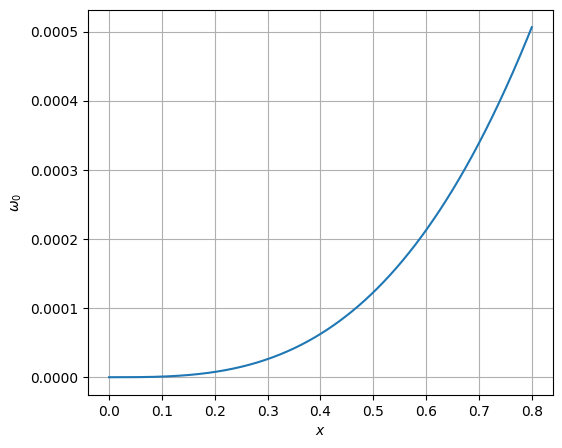

In [39]:
fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(xs, wi)
ax.grid(True)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\omega_0$')
fig.savefig("Figura 1.png", dpi = 300, bbox_inches = 'tight')

In [41]:
wi_2 = wi[:4:1]
xs = xs[:4:1]
err = []
while (xs[-1] < 0.08):

    wi_2 = np.append(wi_2, predictor(xs, wi_2, h * 4))
    #print(f"\n\nPredictor: {wi[-1]}\n\n")
    wi_2[-1], e = corrector_2(xs, wi_2, h * 4)
    err.append(e)
    xs = np.append(xs, xs[-1] + h)
    #print(f"Corrector: {wi[-1]}\n\n")
    #print(f"X: {xs[-1]}")
err = np.array(err)


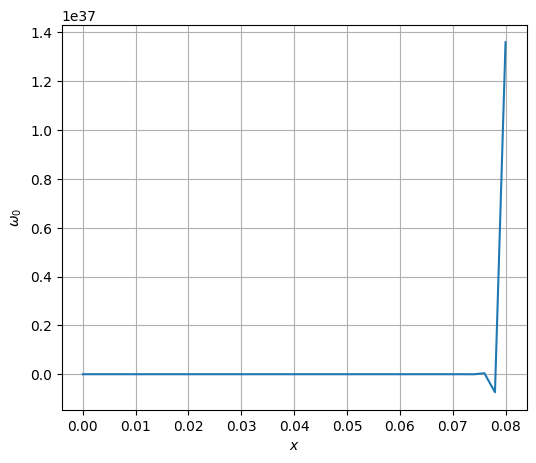

In [42]:
fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(xs, wi_2)
ax.grid(True)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\omega_0$')

fig.savefig("Figura 2.png", dpi = 300, bbox_inches = 'tight')

In [43]:


w_f = wi[-1]
err_F = err[-1]
with open("e4_TarantinoMattia.txt","w") as fp:

    fp.write("----------------------------------------|Quesito Uno|----------------------------------------\n\n")
    fp.write(f"La funzione F(x = 0.8) = {w_f}\n\n")
    fp.write("----------------------------------------|Quesito Due|----------------------------------------\n\n")
    fp.write(f"L'errore della F(x = 0.8) è di: {err_F}\n\n")
    fp.write("----------------------------------------|Quesito Tre|----------------------------------------\n\n")
    fp.write(f"Qui stampo una pseudo tabella\n\n+--------+\n|___wi___|\n+--------+\n")
    for i in range(len(wi_2)):

        if(wi_2[i] >= 0):
            fp.write(f"| {wi_2[i]:.1e}|\n")

        else:

            fp.write(f"|{wi_2[i]:.1e}|\n")
    fp.write("+--------+")
    fp.write(f"\nDai dati, ma anche da una raffigurazzione ( Figura 2 )\nSi nota che con uno step pari a {4 * h}Notiamo una instabilità nella ricostruzione della funzione.")